In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2,random_state=0)

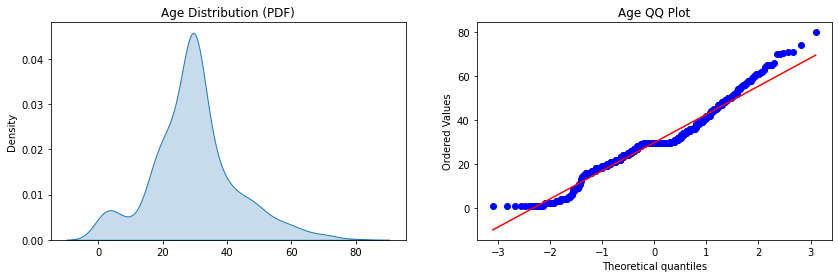

In [7]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(
    x=list(X_train['Age'].dropna()),  # IMPORTANT: convert to list
    fill=True
)
plt.title('Age Distribution (PDF)')

plt.subplot(122)
stats.probplot(
    list(X_train['Age'].dropna()),
    dist="norm",
    plot=plt
)
plt.title('Age QQ Plot')

plt.show()

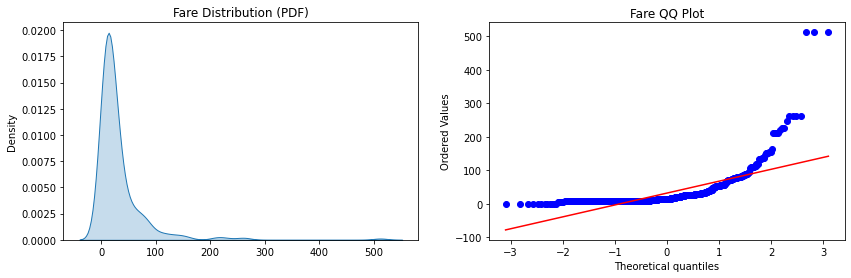

In [8]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(
    x=list(X_train['Fare'].dropna()),  # IMPORTANT: convert to list
    fill=True
)
plt.title('Fare Distribution (PDF)')

plt.subplot(122)
stats.probplot(
    list(X_train['Fare'].dropna()),
    dist="norm",
    plot=plt
)
plt.title('Fare QQ Plot')

plt.show()

In [9]:
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6983240223463687
Accuracy DT 0.6759776536312849


In [11]:
trf = FunctionTransformer(func=np.log1p)

In [12]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [13]:
clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred = clf.predict(X_test_transform)
y_pred1 = clf2.predict(X_test_transform)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.6759776536312849


In [14]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

NameError: name 'X' is not defined

In [15]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

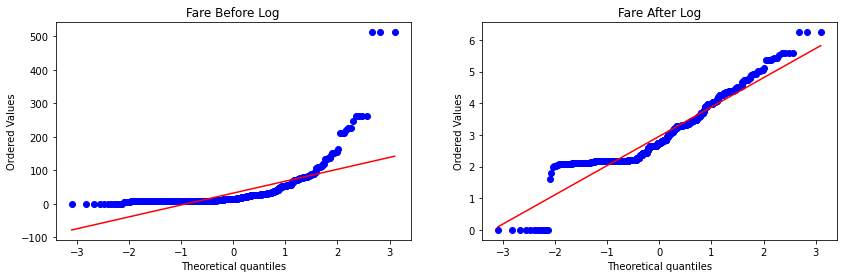

In [16]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

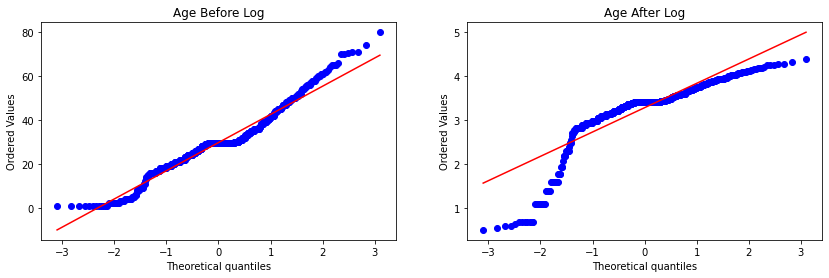

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [18]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [20]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622097378277153


In [22]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


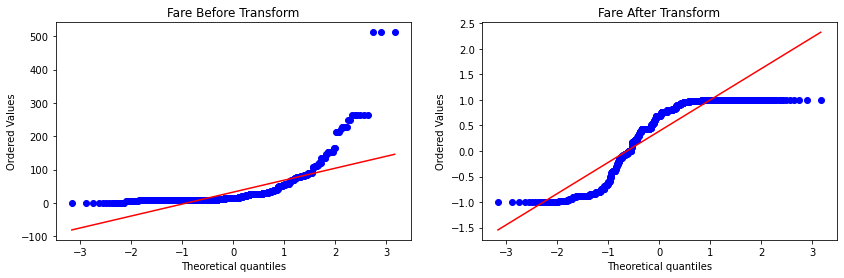

In [23]:
apply_transform(np.sin)